In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff
import torch
from torchvision.transforms import v2

Original Image - Min: 0.13064774870872498, Max: 0.6874189376831055
Augmented Image - Min: 0.4964079260826111, Max: 0.9391508102416992
Number of unique pixel values in the original image: 2173
Number of unique pixel values in the augmented image: 2782937


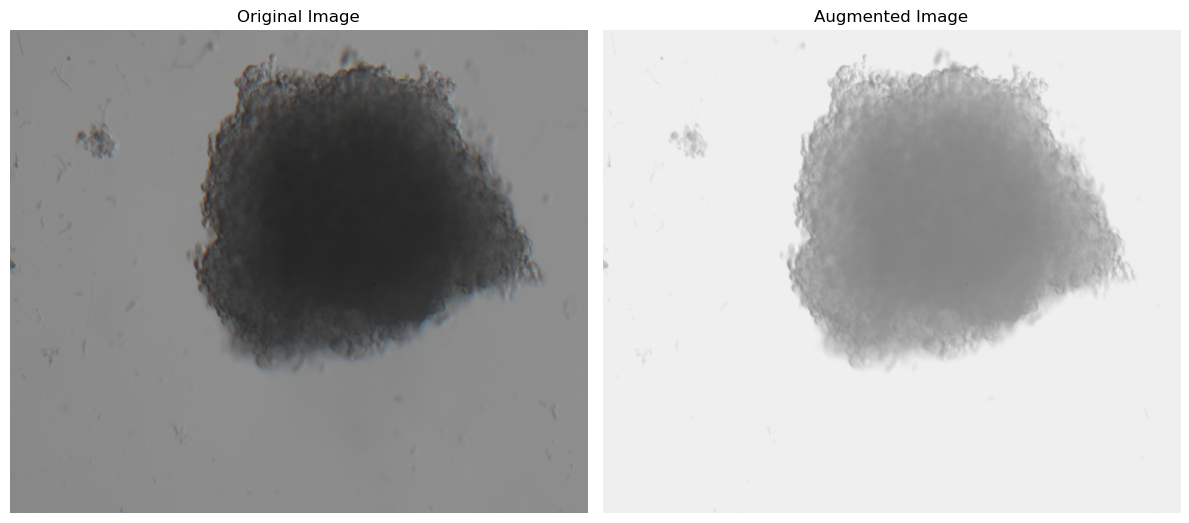

In [56]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision.transforms import v2
import tifffile as tiff  # Import tifffile for reading TIFF images

# Load the image
img_path = r'C:\Users\k54739\Bibin Babu\thesis\Data_supervised\drug_screened\B06-T01.tiff'
image = tiff.imread(img_path)

# Ensure the image has 3 layers (channels)
if image.shape[0] != 3:
    raise ValueError(f"Image {img_path} does not have exactly 3 layers.")

# Convert to float32 for compatibility with transformations
image = image.astype(np.float32) / 65535.0

# Convert the 3-channel image to a tensor
original_image_tensor = torch.from_numpy(image)  # No unsqueeze, keep it as 3 channels

# Define transformations without using PIL
transform = v2.Compose([
    v2.RandomApply([v2.ColorJitter(brightness=1, contrast=1, saturation=1, hue=0)], p=0.8),
])

# Apply the transformations to the original image
augmented_image_tensor = transform(original_image_tensor)  # Transformation directly on tensor

# Convert augmented tensor back to numpy array
augmented_image = augmented_image_tensor.numpy()

# Print min and max pixel values
print(f"Original Image - Min: {image.min()}, Max: {image.max()}")
print(f"Augmented Image - Min: {augmented_image.min()}, Max: {augmented_image.max()}")

# Get unique pixel values and their counts for original and augmented images
unique_original, counts_original = np.unique(image, return_counts=True)
unique_augmented, counts_augmented = np.unique(augmented_image, return_counts=True)

# Print the number of unique pixel values
num_unique_original = len(unique_original)
num_unique_augmented = len(unique_augmented)
print(f"Number of unique pixel values in the original image: {num_unique_original}")
print(f"Number of unique pixel values in the augmented image: {num_unique_augmented}")

# Plot the original and augmented images
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot original image
axs[0].imshow(np.transpose(image, (1, 2, 0)), cmap='gray')  # Transpose for correct display
axs[0].set_title('Original Image')
axs[0].axis('off')

# Plot augmented image
axs[1].imshow(np.transpose(augmented_image, (1, 2, 0)), cmap='gray')  # Transpose for correct display
axs[1].set_title('Augmented Image')
axs[1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


Original Image - Min: 0.13064774870872498, Max: 0.6874189376831055
Augmented Image - Min: 0.43603289127349854, Max: 0.4411206841468811
Number of unique pixel values in the original image: 3839699
Number of unique pixel values in the augmented image: 5044616


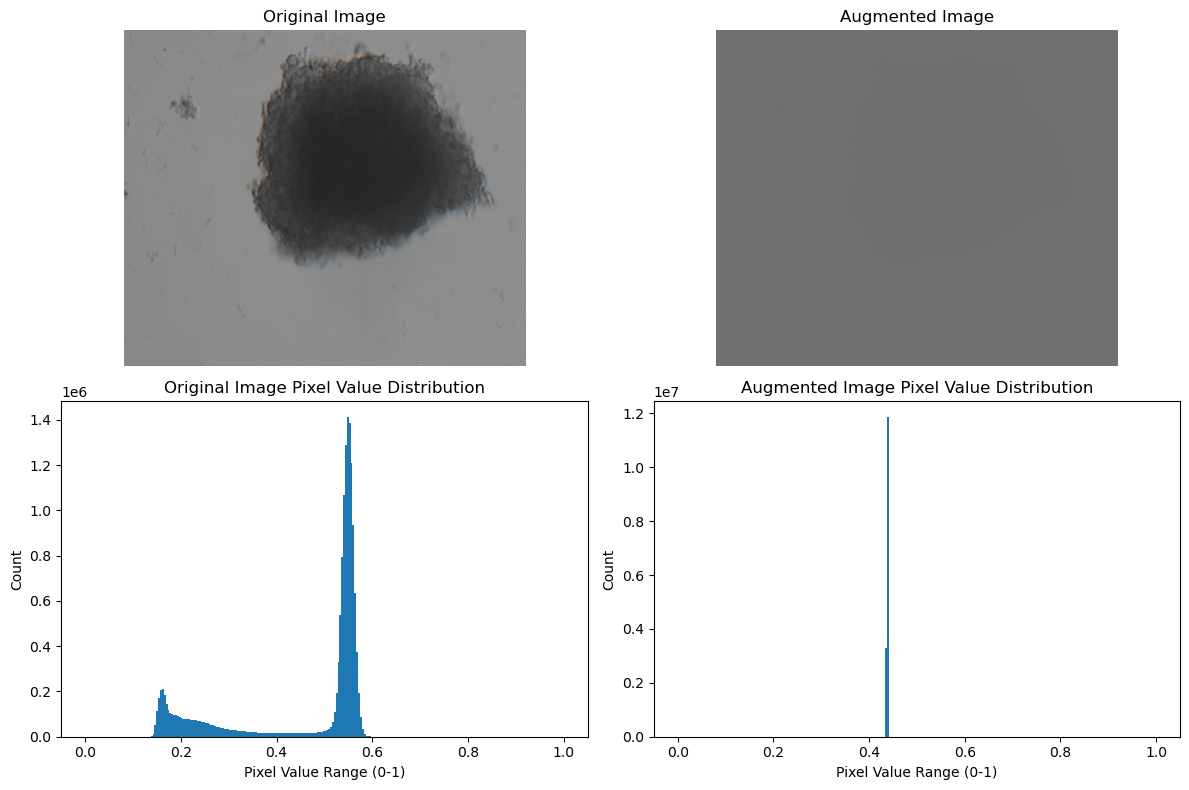

In [53]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision.transforms import v2
import tifffile as tiff

# Load the image
img_path = r'C:\Users\k54739\Bibin Babu\thesis\Data_supervised\drug_screened\B06-T01.tiff'
image = tiff.imread(img_path)

# Ensure the image has 3 layers (channels)
if image.shape[0] != 3:
    raise ValueError(f"Image {img_path} does not have exactly 3 layers.")

# Convert to float32 for compatibility with transformations
image = image.astype(np.float32) / 65535.0

# Convert the 3-channel image to a tensor
original_image_tensor = torch.from_numpy(image)  # No unsqueeze, keep it as 3 channels

# Define transformations without using PIL
transform = v2.Compose([
    v2.RandomApply([v2.ColorJitter(brightness=1, contrast=1, saturation=1, hue=0)], p=0.8),
])

# Apply the transformations to the original image
augmented_image_tensor = transform(original_image_tensor)  # Transformation directly on tensor

# Convert augmented tensor back to numpy array
augmented_image = augmented_image_tensor.numpy()

# Print min and max pixel values
print(f"Original Image - Min: {image.min()}, Max: {image.max()}")
print(f"Augmented Image - Min: {augmented_image.min()}, Max: {augmented_image.max()}")

# Get unique pixel values and their counts for original and augmented images
unique_original, counts_original = np.unique(image.reshape(-1, 3), axis=0, return_counts=True)
unique_augmented, counts_augmented = np.unique(augmented_image.reshape(-1, 3), axis=0, return_counts=True)

# Print the number of unique pixel values
num_unique_original = len(unique_original)
num_unique_augmented = len(unique_augmented)
print(f"Number of unique pixel values in the original image: {num_unique_original}")
print(f"Number of unique pixel values in the augmented image: {num_unique_augmented}")

# Plotting function to count and plot unique values
def plot_pixel_value_distribution(image, title, ax):
    # Flatten the image and count unique values
    pixel_values = image.reshape(-1, 3)  # Reshape to 2D array (N, 3)
    histogram, bin_edges = np.histogram(pixel_values, bins=256, range=(0, 1))

    # Plotting the distribution as a bar plot
    ax.bar(bin_edges[:-1], histogram, width=np.diff(bin_edges), align='edge')
    ax.set_title(title)
    ax.set_xlabel('Pixel Value Range (0-1)')
    ax.set_ylabel('Count')

# Plot the original and augmented image along with their pixel value distributions
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot original image
axs[0, 0].imshow(np.transpose(image, (1, 2, 0)))  # Transpose for correct display
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

# Plot augmented image
axs[0, 1].imshow(np.transpose(augmented_image, (1, 2, 0)))  # Transpose for correct display
axs[0, 1].set_title('Augmented Image')
axs[0, 1].axis('off')

# Plot original image pixel value distribution
plot_pixel_value_distribution(image, 'Original Image Pixel Value Distribution', axs[1, 0])

# Plot augmented image pixel value distribution
plot_pixel_value_distribution(augmented_image, 'Augmented Image Pixel Value Distribution', axs[1, 1])

# Adjust layout
plt.tight_layout()
plt.show()


20% reduction max

Original Image - Min: 0.13064774870872498, Max: 0.6666666865348816
Augmented Image - Min: 0.7000419497489929, Max: 0.7832995057106018
Number of unique pixel values in the original image: 2111
Number of unique pixel values in the augmented image: 1982


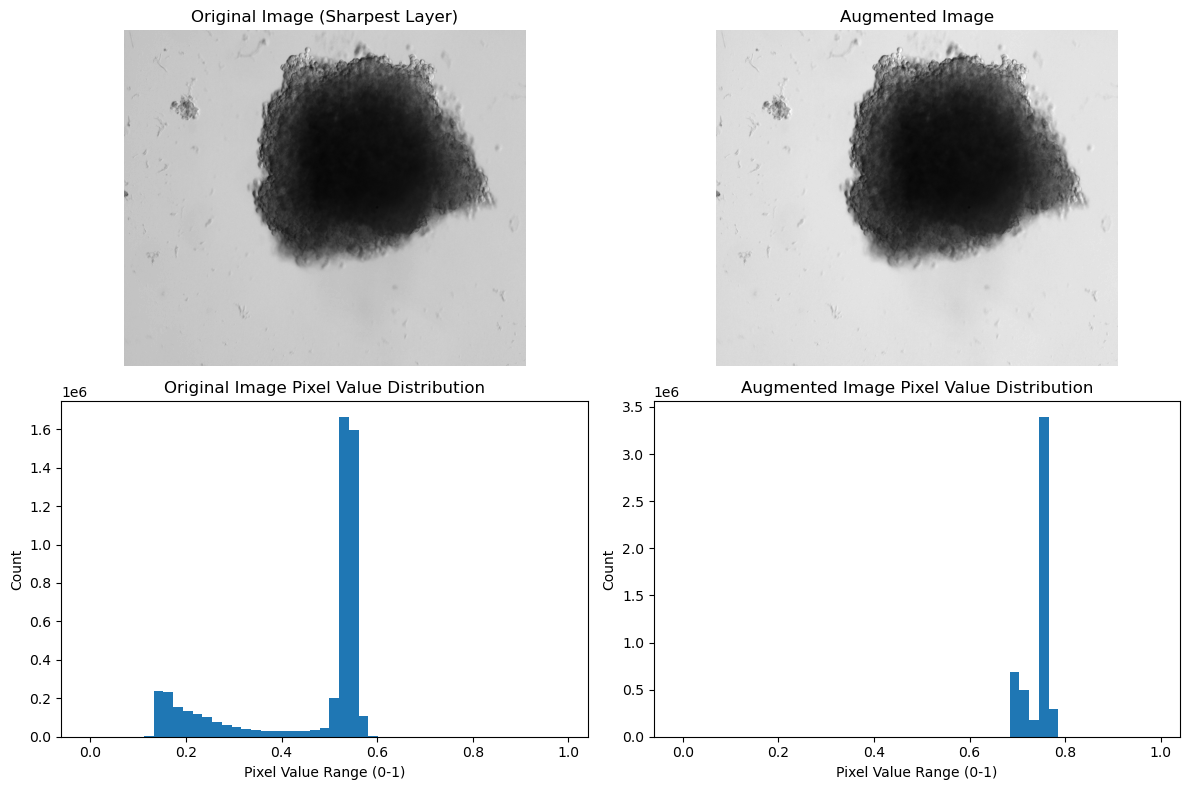

In [43]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision.transforms import v2
import tifffile as tiff  # Make sure to import tifffile for reading TIFF images

# Load the image
img_path = r'C:\Users\k54739\Bibin Babu\thesis\Data_supervised\drug_screened\B06-T01.tiff'
image = tiff.imread(img_path)

# Ensure the image has 3 layers (channels)
if image.shape[0] != 3:
    raise ValueError(f"Image {img_path} does not have exactly 3 layers.")

# Convert to float32 for compatibility with transformations
image = image.astype(np.float32)/65535.0

# Calculate sharpness for each layer
sharpness_scores = []
for i in range(3):
    layer = image[i]
    gy, gx = np.gradient(layer)
    gnorm = np.sqrt(gx**2 + gy**2)
    sharpness = np.average(gnorm)
    sharpness_scores.append(sharpness)

# Get the sharpest layer (considered the original image)
sharpest_layer_index = np.argmax(sharpness_scores)
original_image = image[sharpest_layer_index]

# Convert the sharpest layer (original image) to a tensor
original_image_tensor = torch.from_numpy(original_image).unsqueeze(0)  # Add channel dimension

# Define transformations without using PIL
transform = v2.Compose([
    #v2.RandomPhotometricDistort(p=1)
    v2.RandomApply([v2.ColorJitter(brightness=1, contrast=1, saturation=1, hue=0)], p=0.8),
])

# Apply the transformations to the sharpest layer
augmented_image_tensor = transform(original_image_tensor)  # Transformation directly on tensor

# Convert augmented tensor back to numpy array
augmented_image = augmented_image_tensor.squeeze().numpy()

# Print min and max pixel values
print(f"Original Image - Min: {original_image.min()}, Max: {original_image.max()}")
print(f"Augmented Image - Min: {augmented_image.min()}, Max: {augmented_image.max()}")

# Get unique pixel values and their counts for original and augmented images
unique_original, counts_original = np.unique(original_image, return_counts=True)
unique_augmented, counts_augmented = np.unique(augmented_image, return_counts=True)

# Print the number of unique pixel values
num_unique_original = len(unique_original)
num_unique_augmented = len(unique_augmented)
print(f"Number of unique pixel values in the original image: {num_unique_original}")
print(f"Number of unique pixel values in the augmented image: {num_unique_augmented}")

# Plotting function to count and plot unique values
def plot_pixel_value_distribution(image, title, ax):
    # Flatten the image and count unique values
    pixel_values, counts = np.unique(image.flatten(), return_counts=True)
    
    # Define the bins for the plot (range between 0 and 1)
    bins = np.linspace(0, 1, 50)  # 50 bins between 0 and 1
    bin_counts = np.histogram(pixel_values, bins=bins, weights=counts)[0]

    # Plotting the distribution as a bar plot
    ax.bar(bins[:-1], bin_counts, width=(bins[1] - bins[0]))
    ax.set_title(title)
    ax.set_xlabel('Pixel Value Range (0-1)')
    ax.set_ylabel('Count')

# Plot the original and augmented image along with their pixel value distributions
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot original image
axs[0, 0].imshow(original_image, cmap='gray')
axs[0, 0].set_title('Original Image (Sharpest Layer)')
axs[0, 0].axis('off')

# Plot augmented image
axs[0, 1].imshow(augmented_image, cmap='gray')
axs[0, 1].set_title('Augmented Image')
axs[0, 1].axis('off')

# Plot original image pixel value distribution
plot_pixel_value_distribution(original_image, 'Original Image Pixel Value Distribution', axs[1, 0])

# Plot augmented image pixel value distribution
plot_pixel_value_distribution(augmented_image, 'Augmented Image Pixel Value Distribution', axs[1, 1])

# Adjust layout
plt.tight_layout()
plt.show()


Original Image - Min: 0.13064774870872498, Max: 0.6666666865348816
Augmented Image - Min: 0.020118702203035355, Max: 0.32103562355041504


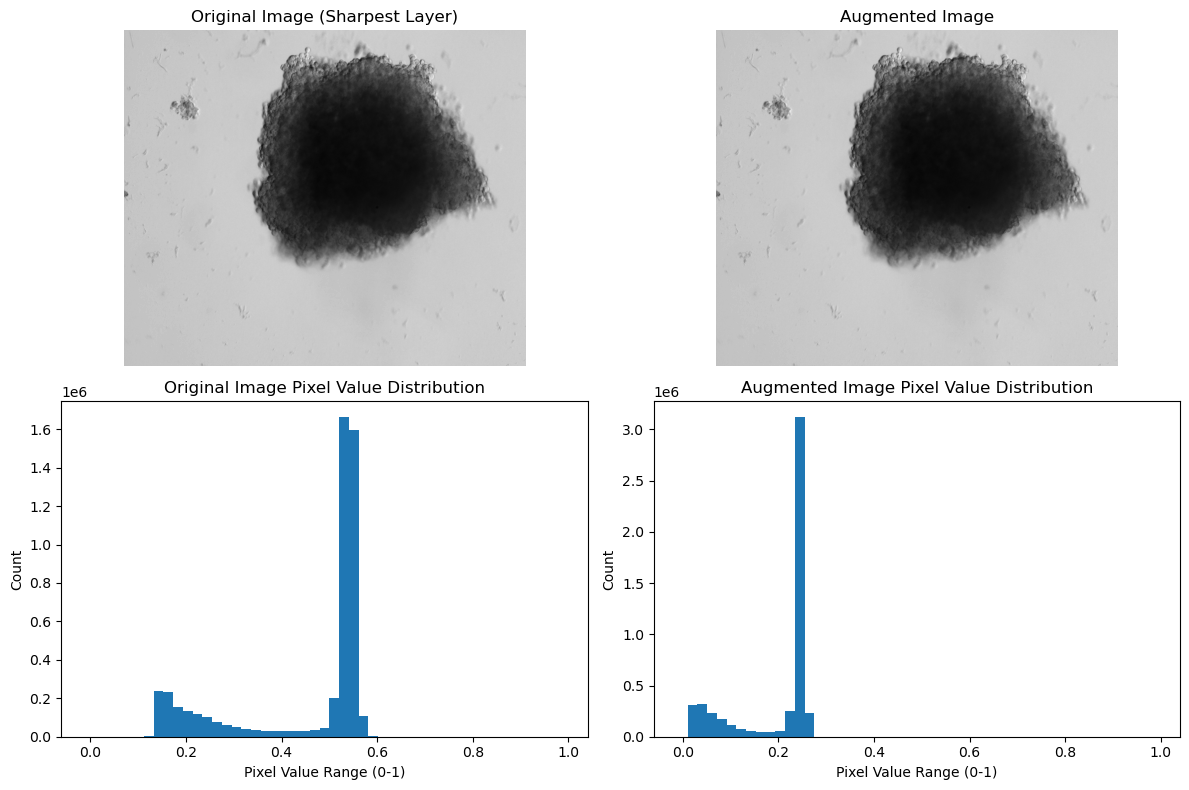

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff
import torch
from torchvision import transforms

# Load the image
img_path = r'C:\Users\k54739\Bibin Babu\thesis\Data_supervised\drug_screened\B06-T01.tiff'
image = tiff.imread(img_path)

# Ensure the image has 3 layers (channels)
if image.shape[0] != 3:
    raise ValueError(f"Image {img_path} does not have exactly 3 layers.")

# Convert to float32 for compatibility with transformations
image = image.astype(np.float32)/ 65535.0

# Calculate sharpness for each layer
sharpness_scores = []
for i in range(3):
    layer = image[i]
    gy, gx = np.gradient(layer)
    gnorm = np.sqrt(gx**2 + gy**2)
    sharpness = np.average(gnorm)
    sharpness_scores.append(sharpness)

# Get the sharpest layer (considered the original image)
sharpest_layer_index = np.argmax(sharpness_scores)
original_image = image[sharpest_layer_index]

# Convert the sharpest layer (original image) to a tensor
original_image_tensor = torch.from_numpy(original_image).unsqueeze(0)  # Add channel dimension

# Define transformations without using PIL
transform = transforms.Compose([
    #transforms.RandomHorizontalFlip(p=1),
    #transforms.RandomResizedCrop(size=96),  # Use tensor size directly
    transforms.RandomApply([transforms.ColorJitter(brightness=1, contrast=1,saturation=1,hue=0)], p=1),
    #transforms.RandomGrayscale(p=0.2),
    #transforms.GaussianBlur(kernel_size=(9, 9))
])

# Apply the transformations to the sharpest layer
augmented_image_tensor = transform(original_image_tensor)  # Transformation directly on tensor

# Convert augmented tensor back to numpy array
augmented_image = augmented_image_tensor.squeeze().numpy()

print(f"Original Image - Min: {original_image.min()}, Max: {original_image.max()}")
print(f"Augmented Image - Min: {augmented_image.min()}, Max: {augmented_image.max()}")

# Plotting function to count and plot unique values
def plot_pixel_value_distribution(image, title, ax):
    # Flatten the image and count unique values
    pixel_values, counts = np.unique(image.flatten(), return_counts=True)
    
    # Define the bins for the plot (range between 0 and 1)
    bins = np.linspace(0, 1, 50)  # 50 bins between 0 and 1
    bin_counts = np.histogram(pixel_values, bins=bins, weights=counts)[0]

    # Plotting the distribution as a bar plot
    ax.bar(bins[:-1], bin_counts, width=(bins[1] - bins[0]))
    ax.set_title(title)
    ax.set_xlabel('Pixel Value Range (0-1)')
    ax.set_ylabel('Count')

# Plot the original and augmented image along with their pixel value distributions
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot original image
axs[0, 0].imshow(original_image, cmap='gray')
axs[0, 0].set_title('Original Image (Sharpest Layer)')
axs[0, 0].axis('off')

# Plot augmented image
axs[0, 1].imshow(augmented_image, cmap='gray')
axs[0, 1].set_title('Augmented Image')
axs[0, 1].axis('off')

# Plot original image pixel value distribution
plot_pixel_value_distribution(original_image, 'Original Image Pixel Value Distribution', axs[1, 0])

# Plot augmented image pixel value distribution
plot_pixel_value_distribution(augmented_image, 'Augmented Image Pixel Value Distribution', axs[1, 1])

# Adjust layout
plt.tight_layout()
plt.show()


Totensor() doesn't do sacling to 0,1 but it convert to tensor so if its 16 bit so we had to divide 65355 by our self.

In [13]:
from PIL import Image
import torch
from torchvision import transforms

# Load the image
img_path = r'C:\Users\k54739\Bibin Babu\thesis\Manuscript\notes\figures\1dop2.png'  # Replace with your image path
image = Image.open(img_path)

# Print original image mode and size
print(f"Original Image Mode: {image.mode}, Size: {image.size}")

# Define the transformation
to_tensor = transforms.ToTensor()

# Convert the image to a tensor
image_tensor = to_tensor(image)
print(f"Original Image - Min: {image_tensor.min()}, Max: {image_tensor.max()}")

# Print the tensor shape and data type
print(f"Tensor Shape: {image_tensor.shape}, Data Type: {image_tensor.dtype}")


Original Image Mode: RGBA, Size: (933, 293)
Original Image - Min: 0.0, Max: 1.0
Tensor Shape: torch.Size([4, 293, 933]), Data Type: torch.float32


augmented_image_tensor is a tensor.
Data type: torch.float32
Original Image - Min: 8562.0, Max: 43690.0
Augmented Image - Min: 8562.0, Max: 43690.0


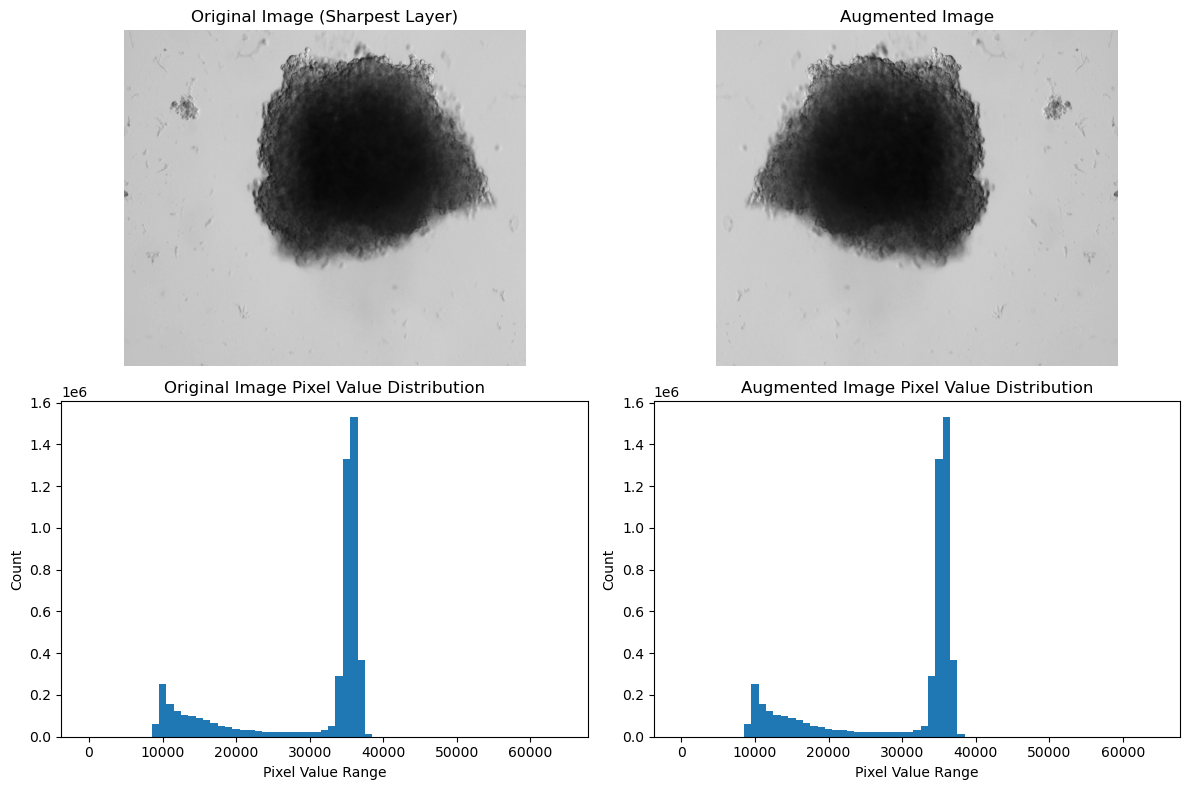

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff
import torch
from torchvision import transforms

# Load the image
img_path = r'C:\Users\k54739\Bibin Babu\thesis\Data_supervised\drug_screened\B06-T01.tiff'
image = tiff.imread(img_path)

# Ensure the image has 3 layers (channels)
if image.shape[0] != 3:
    raise ValueError(f"Image {img_path} does not have exactly 3 layers.")

# Convert to float32 for compatibility with transformations
image = image.astype(np.float32)

# Calculate sharpness for each layer
sharpness_scores = []
for i in range(3):
    layer = image[i]
    gy, gx = np.gradient(layer)
    gnorm = np.sqrt(gx**2 + gy**2)
    sharpness = np.average(gnorm)
    sharpness_scores.append(sharpness)

# Get the sharpest layer (considered the original image)
sharpest_layer_index = np.argmax(sharpness_scores)
original_image = image[sharpest_layer_index]

# Convert the sharpest layer (original image) to a tensor
#original_image_tensor = torch.from_numpy(original_image).unsqueeze(0)  # Add channel dimension

# Define transformations without using PIL
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(p=1),
    #transforms.RandomResizedCrop(size=original_image_tensor.shape[1:], scale=(0.8, 1.0)),  # Use tensor size directly
    #transforms.RandomApply([transforms.ColorJitter(brightness=0.5, contrast=0.5)], p=0.8),
    #transforms.RandomGrayscale(p=0.2),
    #transforms.GaussianBlur(kernel_size=(9, 9))
])

# Apply the transformations to the sharpest layer
augmented_image_tensor = transform(original_image)  # Transformation directly on tensor

# Check if augmented_image is a numpy array and print its type
if isinstance(augmented_image_tensor, torch.Tensor):
    print("augmented_image_tensor is a tensor.")
    print(f"Data type: {augmented_image_tensor.dtype}")
else:
    print("augmented_image_tensor is not a tensor.")

# Convert augmented tensor back to numpy array
augmented_image = augmented_image_tensor.squeeze().numpy()

print(f"Original Image - Min: {original_image.min()}, Max: {original_image.max()}")
print(f"Augmented Image - Min: {augmented_image.min()}, Max: {augmented_image.max()}")

# Plotting function to count and plot unique values
def plot_pixel_value_distribution(image, title, ax):
    # Flatten the image and count unique values in the range 0–65535
    pixel_values, counts = np.unique(image.flatten(), return_counts=True)
    
    # Define the bins for the plot (can adjust the bin width as needed)
    bins = np.arange(0, 65536, 1000)  # 1000-wide bins
    bin_counts = np.histogram(pixel_values, bins=bins, weights=counts)[0]

    # Plotting the distribution as a bar plot
    ax.bar(bins[:-1], bin_counts, width=1000)
    ax.set_title(title)
    ax.set_xlabel('Pixel Value Range')
    ax.set_ylabel('Count')

# Plot the original and augmented image along with their pixel value distributions
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot original image
axs[0, 0].imshow(original_image, cmap='gray')
axs[0, 0].set_title('Original Image (Sharpest Layer)')
axs[0, 0].axis('off')

# Plot augmented image
axs[0, 1].imshow(augmented_image, cmap='gray')
axs[0, 1].set_title('Augmented Image')
axs[0, 1].axis('off')

# Plot original image pixel value distribution
plot_pixel_value_distribution(original_image, 'Original Image Pixel Value Distribution', axs[1, 0])

# Plot augmented image pixel value distribution
plot_pixel_value_distribution(augmented_image, 'Augmented Image Pixel Value Distribution', axs[1, 1])

# Adjust layout
plt.tight_layout()
plt.show()


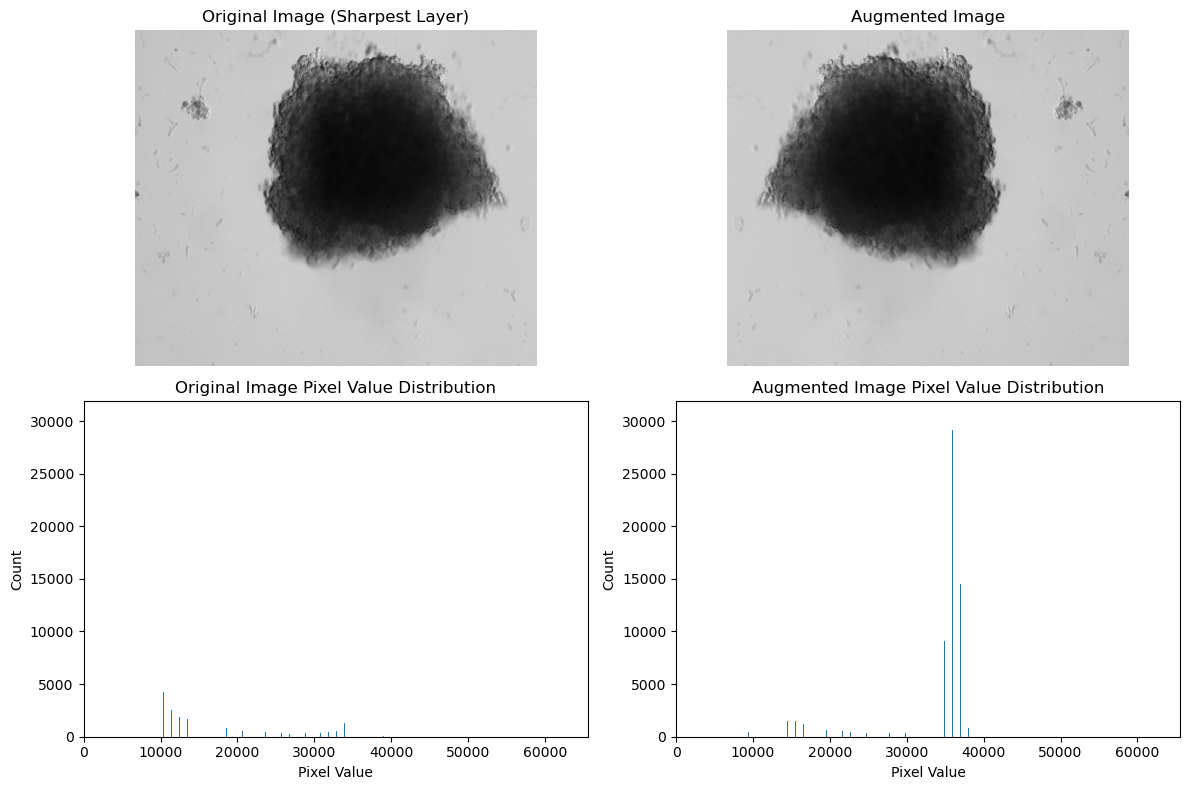

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff
import torch
from torchvision import transforms

# Load the image
img_path = r'C:\Users\k54739\Bibin Babu\thesis\Data_supervised\drug_screened\B06-T01.tiff'
image = tiff.imread(img_path)

# Ensure the image has 3 layers (channels)
if image.shape[0] != 3:
    raise ValueError(f"Image {img_path} does not have exactly 3 layers.")

# Convert to float32 for compatibility with transformations
image = image.astype(np.float32)

# Calculate sharpness for each layer
sharpness_scores = []
for i in range(3):
    layer = image[i]
    gy, gx = np.gradient(layer)
    gnorm = np.sqrt(gx**2 + gy**2)
    sharpness = np.average(gnorm)
    sharpness_scores.append(sharpness)

# Get the sharpest layer (considered the original image)
sharpest_layer_index = np.argmax(sharpness_scores)
original_image = image[sharpest_layer_index]

# Convert the sharpest layer (original image) to a tensor
original_image_tensor = torch.from_numpy(original_image).unsqueeze(0)  # Add channel dimension

# Define transformations without using PIL
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1),
    #transforms.RandomResizedCrop(size=original_image_tensor.shape[1:], scale=(0.8, 1.0)),  # Use tensor size directly
    #transforms.RandomApply([transforms.ColorJitter(brightness=0.5, contrast=0.5)], p=0.8),
    #transforms.RandomGrayscale(p=0.2),
    #transforms.GaussianBlur(kernel_size=(9, 9))
])

# Apply the transformations to the sharpest layer
augmented_image_tensor = transform(original_image_tensor)  # Transformation directly on tensor

# Convert augmented tensor back to numpy array
augmented_image = augmented_image_tensor.squeeze().numpy()

# Plotting function to count and plot unique values across the full range
def plot_pixel_value_distribution(image, title, ax):
    # Flatten the image and count unique values in the range 0–65535 with bin size 1
    pixel_values = image.flatten().astype(np.uint16)  # Convert to uint16 to ensure values are in the range
    bins = np.arange(0, 65536)  # Bins for every pixel value from 0 to 65535
    
    # Get histogram of pixel values
    counts, _ = np.histogram(pixel_values, bins=bins)
    
    # Plotting the distribution as a bar plot
    ax.bar(bins[:-1], counts, width=1)  # Use width=1 to show each pixel value
    ax.set_title(title)
    ax.set_xlabel('Pixel Value')
    ax.set_ylabel('Count')
    ax.set_xlim([0, 65535])  # Ensure the plot covers the full range

# Create subplots: 2 rows (images + bar plots) and 2 columns (original + augmented)
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot original image
axs[0, 0].imshow(original_image, cmap='gray')
axs[0, 0].set_title('Original Image (Sharpest Layer)')
axs[0, 0].axis('off')

# Plot augmented image
axs[0, 1].imshow(augmented_image, cmap='gray')
axs[0, 1].set_title('Augmented Image')
axs[0, 1].axis('off')

# Plot original image pixel value distribution
plot_pixel_value_distribution(original_image, 'Original Image Pixel Value Distribution', axs[1, 0])

# Plot augmented image pixel value distribution
plot_pixel_value_distribution(augmented_image, 'Augmented Image Pixel Value Distribution', axs[1, 1])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


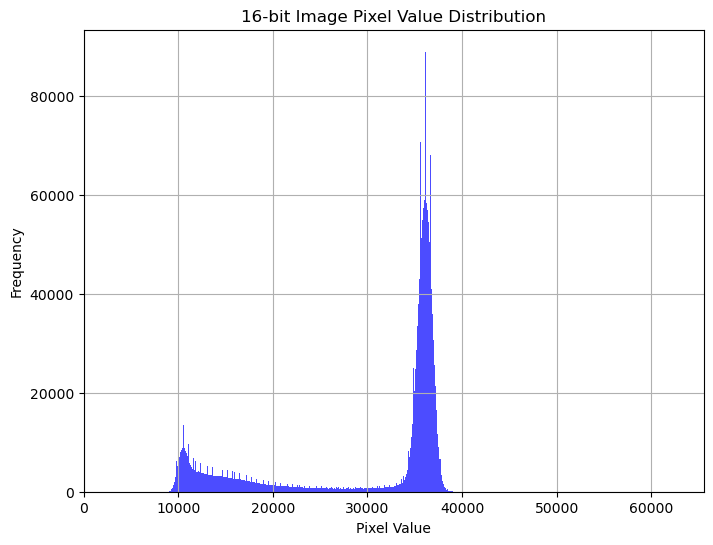

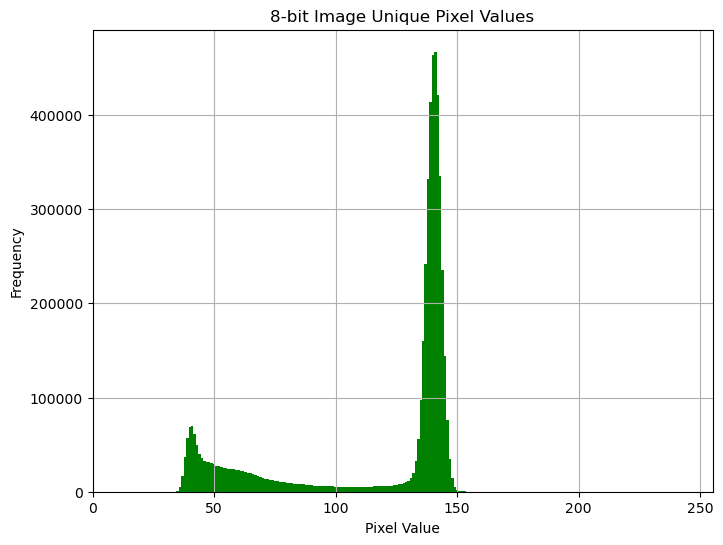

In [26]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the 16-bit TIFF image
image = Image.open(r'C:\Users\k54739\Bibin Babu\thesis\Data_supervised\drug_screened\B06-T01.tiff')

# Convert the image to a NumPy array (16-bit)
image_array_16bit = np.array(image)

# Convert 16-bit to 8-bit by scaling down the pixel values
image_array_8bit = (image_array_16bit / 256).astype('uint8')

# Get the unique pixel values and their counts for both 16-bit and 8-bit images
unique_16bit, counts_16bit = np.unique(image_array_16bit, return_counts=True)
unique_8bit, counts_8bit = np.unique(image_array_8bit, return_counts=True)

# Plot histogram for the 16-bit image with 1000 bins
plt.figure(figsize=(8, 6))
plt.hist(image_array_16bit.flatten(), bins=1000, color='blue', alpha=0.7)
plt.title("16-bit Image Pixel Value Distribution")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.xlim([0, 65535])  # Limit the x-axis to 16-bit range
plt.grid(True)
plt.show()

# Plot histogram for the 8-bit image
plt.figure(figsize=(8, 6))
plt.bar(unique_8bit, counts_8bit, color='green', width=1)
plt.title("8-bit Image Unique Pixel Values")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.xlim([0, 255])
plt.grid(True)
plt.show()


In [ ]:
# 54% reduction

Original Image - Min: 33, Max: 170
Augmented Image - Min: 0.0, Max: 0.24922586977481842
Number of unique pixel values in the original image: 137
Number of unique pixel values in the augmented image: 64


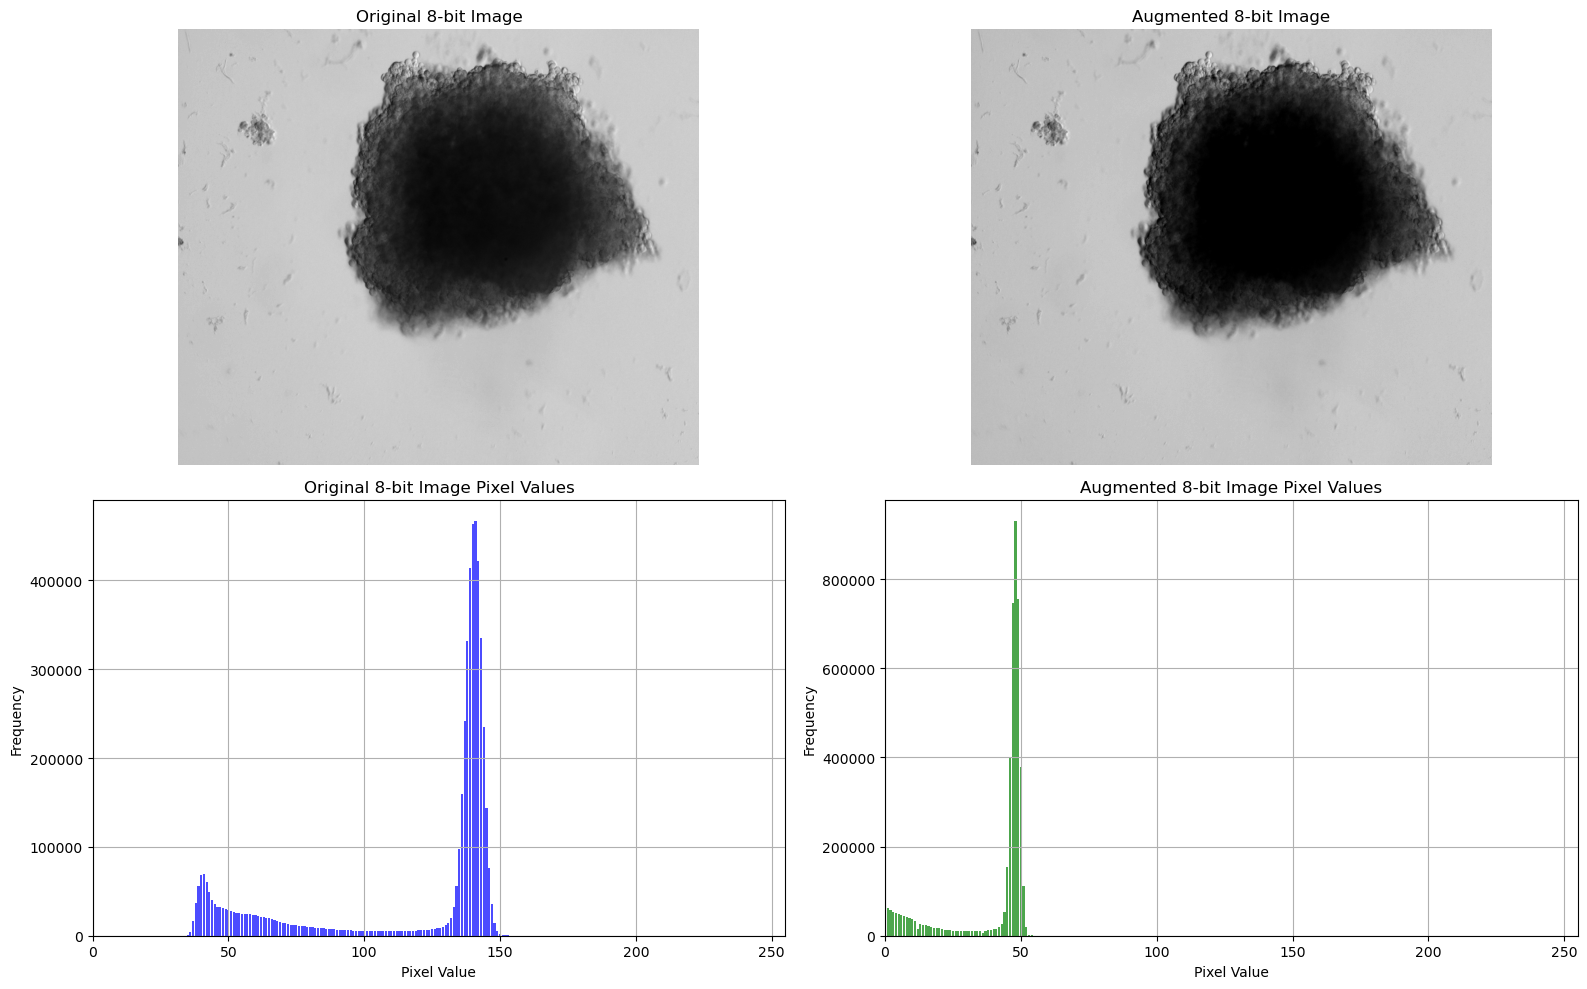

In [35]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision.transforms import v2

# Load the 16-bit TIFF image
image = Image.open(r'C:\Users\k54739\Bibin Babu\thesis\Data_supervised\drug_screened\B06-T01.tiff')

# Convert the image to a NumPy array (16-bit)
image_array_16bit = np.array(image)

# Convert 16-bit to 8-bit by scaling down the pixel values
image_array_8bit = (image_array_16bit / 256).astype('uint8')

# Convert the 8-bit image array to a PyTorch tensor with float data type
original_image_tensor = torch.tensor(image_array_8bit, dtype=torch.float32).unsqueeze(0) / 255.0  # Normalize to [0, 1]

# Define the transformation
transform = v2.Compose([
    # v2.RandomHorizontalFlip(p=1),
    # v2.RandomResizedCrop(size=(original_image_tensor.shape[1], original_image_tensor.shape[2]), scale=(0.8, 1.0)),
    v2.RandomApply([v2.ColorJitter(brightness=1, contrast=1, saturation=1, hue=0)], p=0.8),
    # v2.RandomGrayscale(p=0.2),
    # v2.GaussianBlur(kernel_size=(9, 9))
])

# Apply the transformations to the original image tensor
augmented_image_tensor = transform(original_image_tensor)  # Transformation directly on tensor

# Convert augmented tensor back to numpy array
augmented_image = augmented_image_tensor.squeeze().numpy()  # Remove the channel dimension

# Print min and max pixel values
print(f"Original Image - Min: {image_array_8bit.min()}, Max: {image_array_8bit.max()}")
print(f"Augmented Image - Min: {augmented_image.min()}, Max: {augmented_image.max()}")

# Get unique pixel values and their counts for original and augmented images
unique_original, counts_original = np.unique(image_array_8bit, return_counts=True)
unique_augmented, counts_augmented = np.unique((augmented_image * 255).astype('uint8'), return_counts=True)

# Print the number of unique pixel values
num_unique_original = len(unique_original)
num_unique_augmented = len(unique_augmented)
print(f"Number of unique pixel values in the original image: {num_unique_original}")
print(f"Number of unique pixel values in the augmented image: {num_unique_augmented}")

# Plot original and augmented images, along with histograms
plt.figure(figsize=(16, 10))

# Original 8-bit image
plt.subplot(2, 2, 1)
plt.imshow(image_array_8bit, cmap='gray')
plt.title("Original 8-bit Image")
plt.axis('off')

# Augmented image
plt.subplot(2, 2, 2)
plt.imshow(augmented_image, cmap='gray')
plt.title("Augmented 8-bit Image")
plt.axis('off')

# Histogram for original 8-bit image
plt.subplot(2, 2, 3)
plt.bar(unique_original, counts_original, color='blue', alpha=0.7)
plt.title("Original 8-bit Image Pixel Values")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.xlim([0, 255])
plt.grid(True)

# Histogram for augmented 8-bit image
plt.subplot(2, 2, 4)
plt.bar(unique_augmented, counts_augmented, color='green', alpha=0.7)
plt.title("Augmented 8-bit Image Pixel Values")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.xlim([0, 255])
plt.grid(True)

plt.tight_layout()
plt.show()


In [47]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision.transforms import v2

# Load the 16-bit TIFF image
image = Image.open(r'C:\Users\k54739\Bibin Babu\thesis\Data_supervised\drug_screened\B06-T01.tiff')

# Convert the image to a NumPy array (16-bit)
image_array_16bit = np.array(image)

# Convert 16-bit to 8-bit by scaling down the pixel values
image_array_8bit = (image_array_16bit / 256).astype('uint8')

# Prepare a list to store reduction percentages
reduction_percentages = []

# Run the transformation for 100 loops
for i in range(100):
    # Convert the 8-bit image array to a PyTorch tensor with float data type
    original_image_tensor = torch.tensor(image_array_8bit, dtype=torch.float32).unsqueeze(0) / 255.0  # Normalize to [0, 1]

    # Define the transformation
    transform = v2.Compose([
        # v2.RandomHorizontalFlip(p=1),
        # v2.RandomResizedCrop(size=(original_image_tensor.shape[1], original_image_tensor.shape[2]), scale=(0.8, 1.0)),
        v2.RandomApply([v2.ColorJitter(brightness=1, contrast=1, saturation=1, hue=0)], p=1),
        # v2.RandomGrayscale(p=0.2),
        # v2.GaussianBlur(kernel_size=(9, 9))
    ])

    # Apply the transformations to the original image tensor
    augmented_image_tensor = transform(original_image_tensor)  # Transformation directly on tensor

    # Convert augmented tensor back to numpy array
    augmented_image = augmented_image_tensor.squeeze().numpy()  # Remove the channel dimension

    # Get unique pixel values and their counts for original and augmented images
    unique_original, counts_original = np.unique(image_array_8bit, return_counts=True)
    unique_augmented, counts_augmented = np.unique((augmented_image * 255).astype('uint8'), return_counts=True)

    # Calculate the reduction percentage
    num_unique_original = len(unique_original)
    num_unique_augmented = len(unique_augmented)

    reduction_percentage = ((num_unique_original - num_unique_augmented) / num_unique_original) * 100
    reduction_percentages.append(reduction_percentage)

    # Print the reduction percentage for the current loop
    print(f"Loop {i + 1}: Reduction percentage in unique pixel values: {reduction_percentage:.2f}%")

# Find the maximum and minimum reduction percentages
max_reduction = max(reduction_percentages)
min_reduction = min(reduction_percentages)
print(f"\nMaximum reduction percentage in unique pixel values: {max_reduction:.2f}%")
print(f"Minimum reduction percentage in unique pixel values: {min_reduction:.2f}%")


Loop 1: Reduction percentage in unique pixel values: 27.74%
Loop 2: Reduction percentage in unique pixel values: 81.02%
Loop 3: Reduction percentage in unique pixel values: 32.12%
Loop 4: Reduction percentage in unique pixel values: 70.80%
Loop 5: Reduction percentage in unique pixel values: 8.76%
Loop 6: Reduction percentage in unique pixel values: 48.91%
Loop 7: Reduction percentage in unique pixel values: 17.52%
Loop 8: Reduction percentage in unique pixel values: 93.43%
Loop 9: Reduction percentage in unique pixel values: 37.23%
Loop 10: Reduction percentage in unique pixel values: 89.78%
Loop 11: Reduction percentage in unique pixel values: 27.74%
Loop 12: Reduction percentage in unique pixel values: 78.83%
Loop 13: Reduction percentage in unique pixel values: 42.34%
Loop 14: Reduction percentage in unique pixel values: 97.08%
Loop 15: Reduction percentage in unique pixel values: 13.14%
Loop 16: Reduction percentage in unique pixel values: 32.12%
Loop 17: Reduction percentage in u

In [57]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision.transforms import v2
import tifffile as tiff

# Load the image
img_path = r'C:\Users\k54739\Bibin Babu\thesis\Data_supervised\drug_screened\B06-T01.tiff'
image = tiff.imread(img_path)

# Ensure the image has 3 layers (channels)
if image.shape[0] != 3:
    raise ValueError(f"Image {img_path} does not have exactly 3 layers.")

# Convert to float32 for compatibility with transformations
image = image.astype(np.float32) / 65535.0

# Calculate sharpness for each layer
sharpness_scores = []
for i in range(3):
    layer = image[i]
    gy, gx = np.gradient(layer)
    gnorm = np.sqrt(gx**2 + gy**2)
    sharpness = np.average(gnorm)
    sharpness_scores.append(sharpness)

# Get the sharpest layer (considered the original image)
sharpest_layer_index = np.argmax(sharpness_scores)
original_image = image[sharpest_layer_index]

# Prepare a list to store reduction percentages
reduction_percentages = []

# Run the transformation for 100 loops
for i in range(1000):
    # Convert the sharpest layer to a tensor
    original_image_tensor = torch.from_numpy(original_image).unsqueeze(0)  # Add channel dimension

    # Define transformations without using PIL
    transform = v2.Compose([
        v2.RandomApply([v2.ColorJitter(brightness=1, contrast=1, saturation=1, hue=0)], p=0.8),
    ])

    # Apply the transformations to the sharpest layer
    augmented_image_tensor = transform(original_image_tensor)  # Transformation directly on tensor

    # Convert augmented tensor back to numpy array
    augmented_image = augmented_image_tensor.squeeze().numpy()

    # Get unique pixel values and their counts for original and augmented images
    unique_original, counts_original = np.unique(original_image, return_counts=True)
    unique_augmented, counts_augmented = np.unique(augmented_image, return_counts=True)

    # Calculate the reduction percentage
    num_unique_original = len(unique_original)
    num_unique_augmented = len(unique_augmented)
    reduction_percentage = ((num_unique_original - num_unique_augmented) / num_unique_original) * 100
    reduction_percentages.append(reduction_percentage)

    # Print the reduction percentage for the current loop
    print(f"Loop {i + 1}: Reduction percentage in unique pixel values: {reduction_percentage:.2f}%")

# Find the maximum and minimum reduction percentages
max_reduction = max(reduction_percentages)
min_reduction = min(reduction_percentages)
print(f"\nMaximum reduction percentage in unique pixel values: {max_reduction:.2f}%")
print(f"Minimum reduction percentage in unique pixel values: {min_reduction:.2f}%")


Loop 1: Reduction percentage in unique pixel values: -3.08%
Loop 2: Reduction percentage in unique pixel values: 13.45%
Loop 3: Reduction percentage in unique pixel values: 8.57%
Loop 4: Reduction percentage in unique pixel values: -0.33%
Loop 5: Reduction percentage in unique pixel values: 26.01%
Loop 6: Reduction percentage in unique pixel values: 16.72%
Loop 7: Reduction percentage in unique pixel values: 28.14%
Loop 8: Reduction percentage in unique pixel values: 0.00%
Loop 9: Reduction percentage in unique pixel values: -0.24%
Loop 10: Reduction percentage in unique pixel values: 0.00%
Loop 11: Reduction percentage in unique pixel values: 11.94%
Loop 12: Reduction percentage in unique pixel values: 0.00%
Loop 13: Reduction percentage in unique pixel values: 17.72%
Loop 14: Reduction percentage in unique pixel values: 35.43%
Loop 15: Reduction percentage in unique pixel values: 15.49%
Loop 16: Reduction percentage in unique pixel values: 9.00%
Loop 17: Reduction percentage in uniqu

In [49]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision.transforms import v2
import tifffile as tiff

# Load the image
img_path = r'C:\Users\k54739\Bibin Babu\thesis\Data_supervised\drug_screened\B06-T01.tiff'
image = tiff.imread(img_path)

# Ensure the image has 3 layers (channels)
if image.shape[0] != 3:
    raise ValueError(f"Image {img_path} does not have exactly 3 layers.")

# Convert to float32 for compatibility with transformations
image = image.astype(np.float32) / 65535.0

# Prepare a list to store reduction percentages
reduction_percentages = []

# Run the transformation for 100 loops
for i in range(100):
    # Convert the image to a tensor
    original_image_tensor = torch.from_numpy(image).unsqueeze(0)  # Add channel dimension

    # Define transformations without using PIL
    transform = v2.Compose([
        v2.RandomApply([v2.ColorJitter(brightness=1, contrast=1, saturation=1, hue=0)], p=0.8),
    ])

    # Apply the transformations to the entire image
    augmented_image_tensor = transform(original_image_tensor)  # Transformation directly on tensor

    # Convert augmented tensor back to numpy array
    augmented_image = augmented_image_tensor.squeeze().numpy()

    # Get unique pixel values and their counts for original and augmented images
    unique_original, counts_original = np.unique(image, return_counts=True)
    unique_augmented, counts_augmented = np.unique(augmented_image, return_counts=True)

    # Calculate the reduction percentage
    num_unique_original = len(unique_original)
    num_unique_augmented = len(unique_augmented)
    reduction_percentage = ((num_unique_original - num_unique_augmented) / num_unique_original) * 100
    reduction_percentages.append(reduction_percentage)

    # Print the reduction percentage for the current loop
    print(f"Loop {i + 1}: Reduction percentage in unique pixel values: {reduction_percentage:.2f}%")

# Find the maximum and minimum reduction percentages
max_reduction = max(reduction_percentages)
min_reduction = min(reduction_percentages)
print(f"\nMaximum reduction percentage in unique pixel values: {max_reduction:.2f}%")
print(f"Minimum reduction percentage in unique pixel values: {min_reduction:.2f}%")


Loop 1: Reduction percentage in unique pixel values: -54307.87%
Loop 2: Reduction percentage in unique pixel values: -148528.21%
Loop 3: Reduction percentage in unique pixel values: -225022.55%
Loop 4: Reduction percentage in unique pixel values: -197136.03%
Loop 5: Reduction percentage in unique pixel values: -206017.95%
Loop 6: Reduction percentage in unique pixel values: -156228.26%
Loop 7: Reduction percentage in unique pixel values: -102106.72%
Loop 8: Reduction percentage in unique pixel values: -204074.28%
Loop 9: Reduction percentage in unique pixel values: -107511.23%
Loop 10: Reduction percentage in unique pixel values: -103927.61%
Loop 11: Reduction percentage in unique pixel values: -55549.33%
Loop 12: Reduction percentage in unique pixel values: -185327.47%
Loop 13: Reduction percentage in unique pixel values: -134396.78%
Loop 14: Reduction percentage in unique pixel values: -192269.95%
Loop 15: Reduction percentage in unique pixel values: -171559.41%
Loop 16: Reduction pe

conclusion: we can't use 3 layer for v2. color jitter since its increase brightness or something else which will be completely out of dataset distribution. ( increase in unique values -109318.50% ) visually it doesn't make sense, I mean if its all more white then the number of unique channel should reduce right ? maybe the increase happend  in close like , 65355, 653554 , 65353, 65352,65351, 653530 etc.

problem is we need to use 3 channel if we are using pretrained mri unet since its require. ( maybe not we can change the unet model to handle single channel as input)
but with one channel it works. for 100 epochs percentage of reduction is max 48% and increase the unique pixel values by 5 percentage
for 8 bit its 99%.